### **Death & Recovery based on Gender**

MALE_RECOVERED  :  366
FEMALE_RECOVERED  :  142
[366, 142]


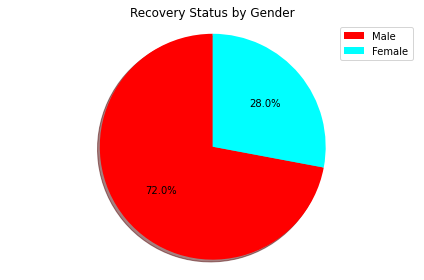

MALE_DEATH  :  349
FEMALE_DEATH  :  145
[349, 145]


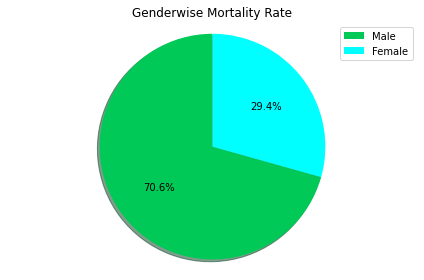

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt


df = pd.read_csv("covidDataset.csv")
colors = ['#FF0000','#00FFFF']
#'#00C957','#FFD700','#ffcc99','#99ff99','#FF34B3'
sizes = []

key_counts = {}
key_counts1 = {}
key_counts['male_recovered'] = 0 
key_counts['female_recovered'] = 0
key_counts1['male_death'] = 0
key_counts1['female_death'] = 0

for gender,status in zip(df['Gender'],df['Status']):
  if gender == 'Male':
    if status == 'Recovered':
      key_counts['male_recovered'] += 1
    else:
      key_counts1['male_death'] += 1
  else :
    if status == 'Recovered':
      key_counts['female_recovered'] += 1
    else:
      key_counts1['female_death'] += 1

for key,value in key_counts.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Recovery Status by Gender")
ax1.pie(sizes, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Male","Female"])
plt.show()

sizes = []

for key,value in key_counts1.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Genderwise Mortality Rate")
ax1.pie(sizes, colors=['#00C957','#00FFFF'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Male","Female"])
plt.show()

### **Death and Recovery based on Vaccination Status**

VACCINATED_RECOVERED  :  237
NOT_VACCINATED_RECOVERED  :  271
[237, 271]


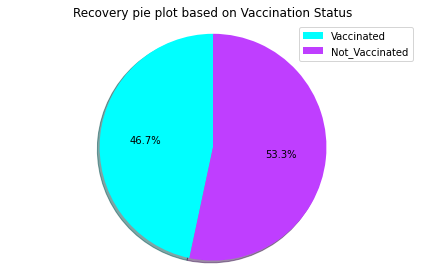

VACCINATED_DEATH  :  242
NOT_VACCINATED_DEATH  :  252
[242, 252]


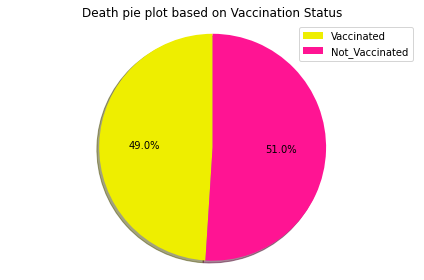

In [ ]:
df = pd.read_csv("covidDataset.csv")
key_counts = {}
key_counts1 = {}
key_counts['Vaccinated_recovered'] = 0 
key_counts['Not_Vaccinated_recovered'] = 0
key_counts1['Vaccinated_death'] = 0
key_counts1['Not_Vaccinated_death'] = 0

sizes = []
for Vaccination,status in zip(df['Vaccination Status'],df['Status']):
  if Vaccination == 'Vaccinated':
    if status == 'Recovered':
      key_counts['Vaccinated_recovered'] += 1
    else:
      key_counts1['Vaccinated_death'] += 1
  else :
    if status == 'Recovered':
      key_counts['Not_Vaccinated_recovered'] += 1
    else:
      key_counts1['Not_Vaccinated_death'] += 1

for key,value in key_counts.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Recovery pie plot based on Vaccination Status")
ax1.pie(sizes, colors=['#00FFFF','#BF3EFF'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Vaccinated","Not_Vaccinated"])
plt.show()

sizes = []

for key,value in key_counts1.items():
  print(key.upper()," : ",value)
  sizes.append(value)
print(sizes)

fig1, ax1 = plt.subplots()
plt.title("Death pie plot based on Vaccination Status")
ax1.pie(sizes, colors=['#EEEE00','#FF1493'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(["Vaccinated","Not_Vaccinated"])

plt.show()

### **Strip Plot**

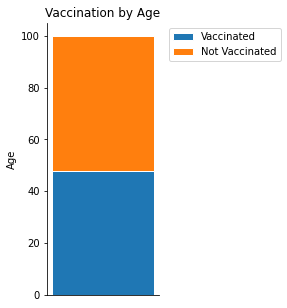

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("covidDataset.csv")
df_status = df['Vaccination Status']
df_count = df_status.value_counts()
df_count
df_count = df_count.reindex(index = ["Vaccinated" , "Not Vaccinated"])
df_count
df_label = df_count.index.tolist()

into_perc = (df_count/df_count.sum())*100
into_perc

cf = into_perc.cumsum()
cf

#define figure
fig,ax = plt.subplots(1,figsize = (2,5))

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar(0,into_perc[0],edgecolor = "white",width = 0.5)

for i in range(1,len(df_count)):
  plt.bar(0,into_perc[i],bottom = cf[i-1],edgecolor = "white",width = 0.5)

plt.title("Vaccination by Age")
plt.legend(df_label,bbox_to_anchor = (1.05,1))
plt.ylabel("Age")

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.show()


### **Date wise bar graph on Death and Recovery**


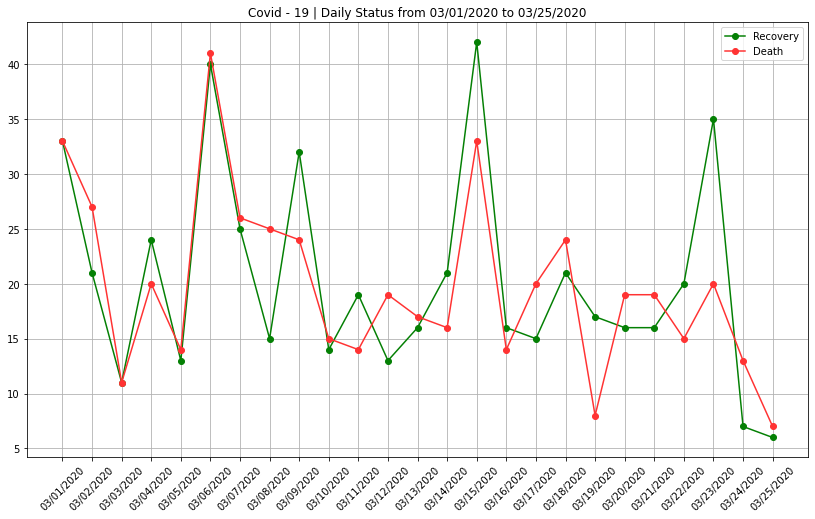

In [ ]:
date_list = df['Date'].unique()
# print(date_list)
death_date_data = {date:0 for date in date_list}
recovery_date_data = {date:0 for date in date_list}
# print(death_date_data)
# print(recovery_date_data)
for date,status in zip(df['Date'],df['Status']):
  if status == "Recovered":
    recovery_date_data[f'{date}']+=1
  else:
    death_date_data[f'{date}']+=1

li = (recovery_date_data.items())
li2 = (death_date_data.items())
# print(li)
x,y = zip(*li)
# print(x)
# print(y)
x1,y1 = zip(*li2)
plt.figure(figsize=[14,8])
#uncomment to make it dark mode
# plt.style.use('dark_background')
plt.title(f"Covid - 19 | Daily Status from {date_list[0]} to {date_list[-1]}")
plt.plot(x,y,marker='o',label="Recovery",color='#048004')
plt.plot(x1,y1,marker='o',label="Death",color='#FF3333')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

### **Test Code ( Don't touch this )**

In [ ]:
import plotly.express as px

dataset = pd.DataFrame(columns=["Date","Recovery Count","Death Count"])
for i,j in zip(recovery_date_data,death_date_data):
  dataset = dataset.append(pd.DataFrame({
      "Date":[i],
      "Recovery Count":recovery_date_data[i],
      "Death Count":death_date_data[j],
  }))

fig = px.line(dataset, x="Date", y="Recovery Count",markers=True)
fig.add_scatter(x=dataset['Date'], y=dataset['Death Count'], mode='markers+lines')
fig.show()

### **Map Plotting**

In [84]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

df = pd.read_csv('covidDataset.csv')
df = df[:800]
map = folium.Map(location=[10.024736517586764, 76.30792709032183],zoom_start=15)

recovered = folium.FeatureGroup(name="Recovered")
death = folium.FeatureGroup(name="Death")

for index,row in df.iterrows():
  tooltip = row['Name of Patient']
  popup = tooltip + "\n" + row['Gender'] + "\n" + row['Vaccination Status']
  if row['Status'] == 'Recovered':
    folium.Marker(location=[row['Longitude'],row['Latitude']],popup=popup,tooltip=tooltip,icon=folium.Icon(color="green")).add_to(recovered)
  else:
    folium.Marker(location=[row['Longitude'],row['Latitude']],popup=popup,tooltip=tooltip,icon=folium.Icon(color="red", icon="info-sign")).add_to(death)

map.add_child(recovered)
map.add_child(death)
map.add_child(folium.map.LayerControl())
map.save('map-new.html')
map